Fashion MNIST data classification project

step-1) import librraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

step-2)Load data

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

#print shape of data

In [3]:
X_train.shape,y_train.shape,"******",X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0]

9

In [6]:
class_labels=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [7]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#show image

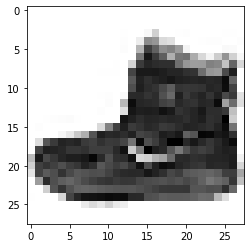

In [8]:
plt.imshow(X_train[0],cmap='Greys')

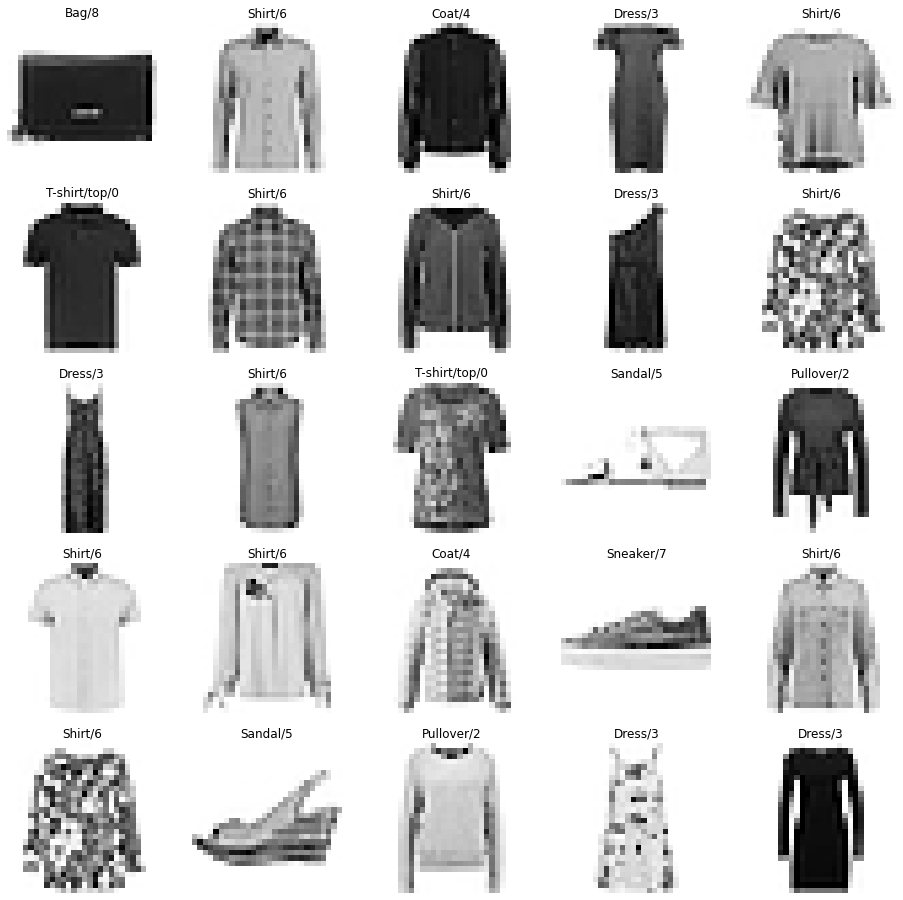

In [9]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
 plt.subplot(5,5,j);
 j+=1
 plt.imshow(X_train[i],cmap='Greys')
 plt.axis("off")
 plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))


In [10]:
X_train.ndim

3

In [11]:
X_train=np.expand_dims(X_train,-1)

In [12]:
X_train.ndim

4

In [13]:
X_test=np.expand_dims(X_test,-1)

#feature scaling

In [14]:
X_train=X_train/255

In [15]:
X_test=X_test/255

#split dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [18]:
X_train.shape,X_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

Step-3) Building CNN model

In [19]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 8s 86ms/step - loss: 0.6066 - accuracy: 0.7941 - val_loss: 0.4242 - val_accuracy: 0.8496
Epoch 2/10
94/94 [==============================] - 7s 69ms/step - loss: 0.3766 - accuracy: 0.8681 - val_loss: 0.3580 - val_accuracy: 0.8773
Epoch 3/10
94/94 [==============================] - 8s 84ms/step - loss: 0.3296 - accuracy: 0.8844 - val_loss: 0.3322 - val_accuracy: 0.8832
Epoch 4/10
94/94 [==============================] - 7s 71ms/step - loss: 0.3002 - accuracy: 0.8946 - val_loss: 0.3362 - val_accuracy: 0.8825
Epoch 5/10
94/94 [==============================] - 8s 89ms/step - loss: 0.2800 - accuracy: 0.9009 - val_loss: 0.3091 - val_accuracy: 0.8943
Epoch 6/10
94/94 [==============================] - 8s 86ms/step - loss: 0.2609 - accuracy: 0.9080 - val_loss: 0.2958 - val_accuracy: 0.8969
Epoch 7/10
94/94 [==============================] - 8s 87ms/step - loss: 0.2483 - accuracy: 0.9118 - val_loss: 0.2866 - val_accuracy: 0.9008
Epoch 8/10
94

In [23]:
y_pred=model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 3ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.97, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.1 , 0.09, 0.01]], dtype=float32)

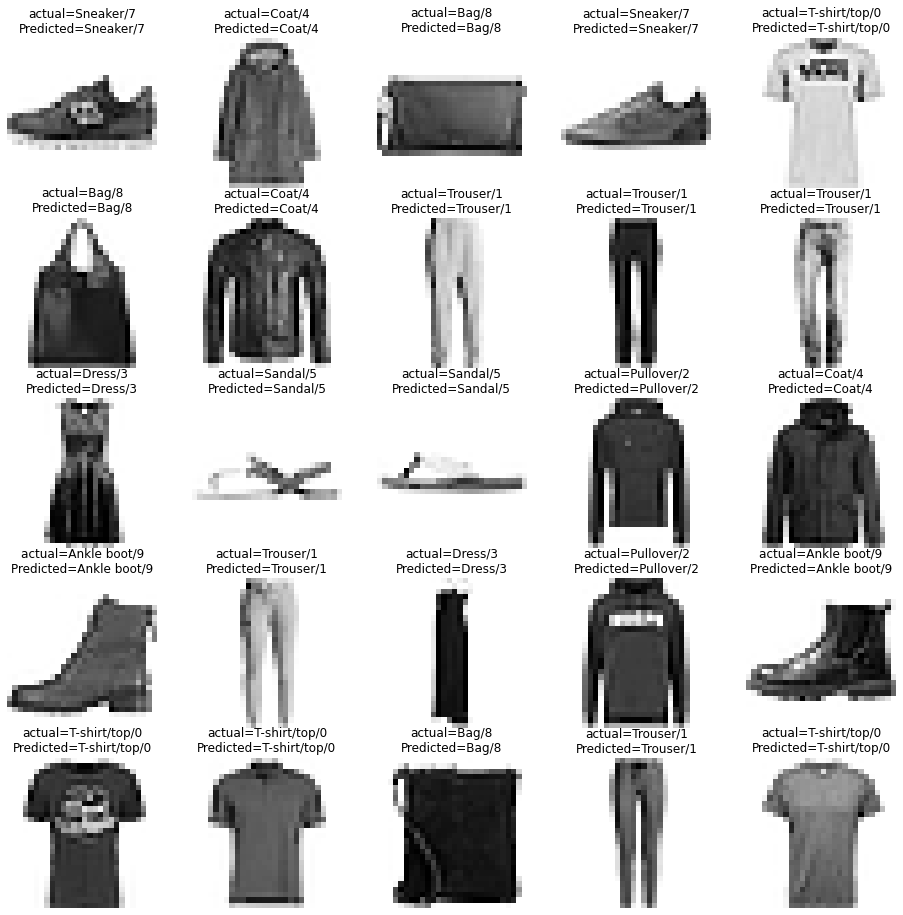

In [24]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
 plt.subplot(5,5,j);
 j+=1
 plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
 plt.axis("off")
 plt.title('actual={}/{}\nPredicted={}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))


In [26]:
"""##Confusion matrix""" 

'##Confusion matrix'

In [30]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels=[ np.argmax(labels) for labels in y_pred ]
cm=confusion_matrix(y_test,y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.83      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.84      0.84      1000
       Dress       0.90      0.89      0.90      1000
        Coat       0.86      0.83      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.69      0.75      0.72      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



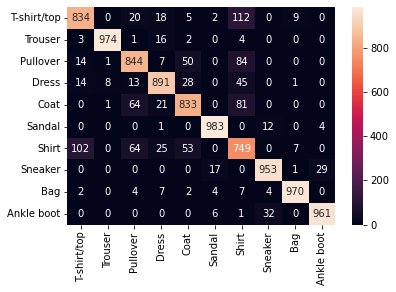

In [39]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)
##annot – an array of the same shape as data which is used to annotate the heatmap. 
##cmap – a matplotlib colormap name or object. This maps the data values to the color space. 
##fmt – string formatting code to use when adding annotations.

In [32]:
"""##save model"""

'##save model'

In [33]:
model.save('fashion_mnist_cnn_model.h5')

In [34]:
"""Build 2 Complex CNN"""

'Build 2 Complex CNN'

In [35]:
cnn_model2=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [36]:
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 7s 73ms/step - loss: 0.2068 - accuracy: 0.9260 - val_loss: 0.2666 - val_accuracy: 0.9072
Epoch 2/10
94/94 [==============================] - 7s 73ms/step - loss: 0.1929 - accuracy: 0.9316 - val_loss: 0.2891 - val_accuracy: 0.8992
Epoch 3/10
94/94 [==============================] - 7s 75ms/step - loss: 0.1858 - accuracy: 0.9331 - val_loss: 0.2617 - val_accuracy: 0.9102
Epoch 4/10
94/94 [==============================] - 8s 86ms/step - loss: 0.1777 - accuracy: 0.9365 - val_loss: 0.2658 - val_accuracy: 0.9076
Epoch 5/10
94/94 [==============================] - 8s 90ms/step - loss: 0.1702 - accuracy: 0.9386 - val_loss: 0.2642 - val_accuracy: 0.9095
Epoch 6/10
94/94 [==============================] - 9s 93ms/step - loss: 0.1614 - accuracy: 0.9432 - val_loss: 0.2669 - val_accuracy: 0.9078
Epoch 7/10
94/94 [==============================] - 8s 89ms/step - loss: 0.1550 - accuracy: 0.9446 - val_loss: 0.2657 - val_accuracy: 0.9117
Epoch 8/10
94

In [38]:
cnn_model2.save('fashion_mnist_cnn_model.h5')

In [ ]:
"""Build 3 Complex CNN"""

In [ ]:
cnn_model3=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
cnn_model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

In [ ]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [ ]:
cnn_models.evaluate(X_test)